In [180]:
import numpy as np 
import pandas as pd 

# data visulization & analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning methods
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler




In [162]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [163]:
print(training.shape)
print(training.columns)
print(training.isnull().sum())
# print(training.info())
print(training.head())
# print("\n")
# print(testing.info())
# training.describe()

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0     

In [164]:
# EXPLORATORY DATA ANALYSIS

# training['Sex'].value_counts()
training['Embarked'].value_counts()
# sns.countplot(x = 'Pclass', data = training)
# sns.countplot(x = 'Embarked', data = training)  # C = Cherbourg, Q = Queenstown, S = Southampton
# sns.countplot(x = 'SibSp', data = training)
# sns.countplot(x = 'Survived', data = training)
# sns.countplot(x = 'Sex', data = training)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

        Survived  Died
Sex                   
female       233    81
male         109   468


<AxesSubplot:xlabel='Sex'>

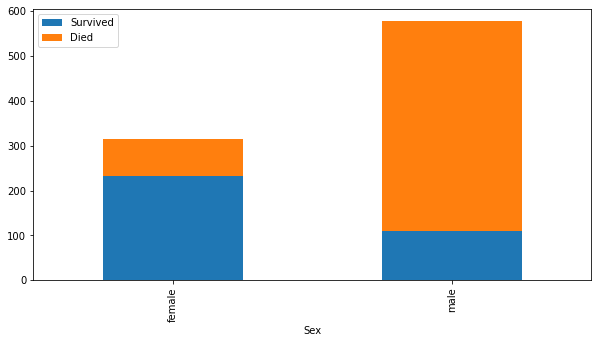

In [165]:
# SEEING IF SURVIVAL RATE VARIES BY GENDER

#  Adding new "Died" column to get survival rate
training['Died'] = 1 - training['Survived']

t1 = training.groupby('Sex').agg('sum')[['Survived', 'Died']]
print(t1)
      
t1.plot(kind='bar',figsize = (10,5),stacked = True) 

<AxesSubplot:xlabel='Sex'>

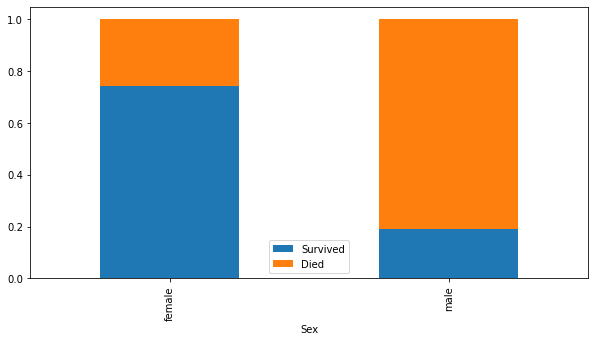

In [166]:
# Same as above but shown as % of gender surviving
training.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                               figsize = (10,5),
                                                               stacked = True
                                                              )

<AxesSubplot:xlabel='Pclass'>

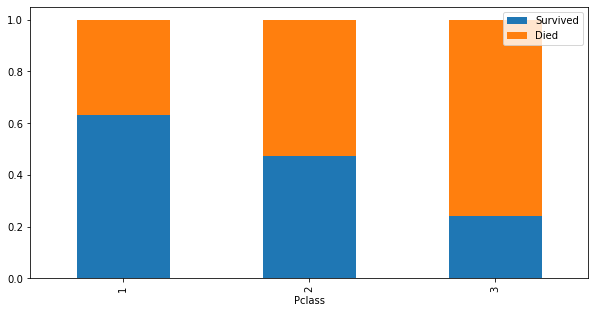

In [167]:
# Does Survival rate vary by Pclass?

training.groupby('Pclass').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                               figsize = (10,5),
                                                               stacked = True
                                                              )

<AxesSubplot:xlabel='Embarked'>

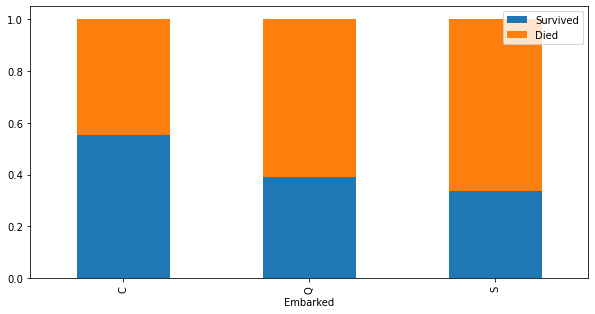

In [168]:
# Does Survival rate vary by Embarked?

training.groupby('Embarked').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                               figsize = (10,5),
                                                               stacked = True
                                                              ) 

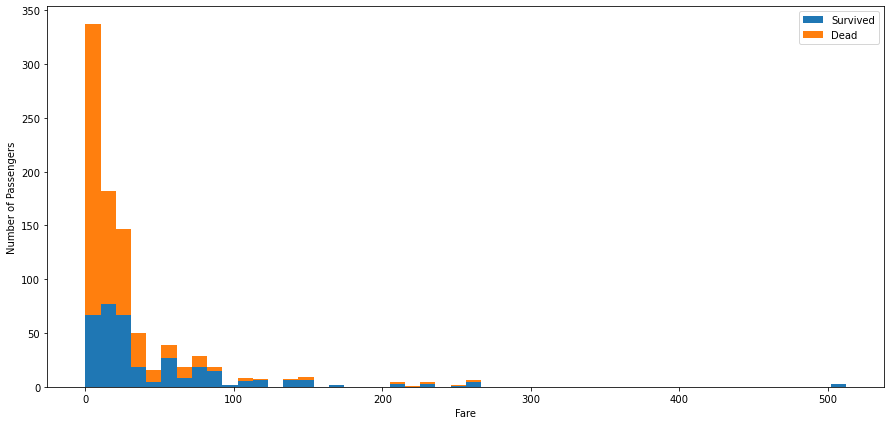

In [169]:
#  VISUALIZING SURVIVAL BASED ON FARE

figure = plt.figure(figsize=(15,7))

plt.hist([training[training['Survived'] == 1]['Fare'], training[training['Died'] == 1]["Fare"]],
         stacked = True,
         bins = 50, 
         label = ['Survived', 'Dead']
        )
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

# very few passengers with high fares died 

In [170]:
# CREATING A FEATURE: "TITLE"

# Let's see if I can extract the titles for each passenger ("Sir", "Mr.", "Miss", etc.)
# training["Name"] is in format: "[lastname], [title]. [first name]"
# ** this only works because all passengers have a title

# Can isolate the title by splitting on "," and taking the second part,
# then splitting on "." and taking the first part

titles = set()
part1 = ""
part2 = ""

for name in training['Name']:
    part1 = name.split(',')[1]
    part2 = part1.split('.')[0]
    titles.add(part2.strip())
    
print(titles)

{'Mlle', 'Miss', 'Rev', 'Dr', 'Mr', 'Lady', 'Master', 'Col', 'Capt', 'the Countess', 'Ms', 'Jonkheer', 'Don', 'Mrs', 'Major', 'Mme', 'Sir'}


In [171]:
# Can simplify the Titles with this dictionary:
Title_Dictionary = {"Capt"  : "Officer", 
                    "Col"   : "Officer",
                    "Major" : "Officer",
                    "Dr"    : "Officer", 
                    "Rev"   : "Officer", 
                    "Don"   : "Royalty", 
                    "Sir"   : "Royalty", 
                    "Jonkheer": "Royalty",
                    "the Countess":"Royalty", 
                    "Mr"    : "Mr", 
                    "Mme"   : "Mrs", 
                    "Mrs"   : "Mrs", 
                    "Ms"    : "Miss", 
                    "Miss"  : "Miss", 
                    "Mlle"  : "Miss", 
                    "Master" : "Master", 
                    "Lady"  : "Royalty" 
                    }
    

In [172]:
# adding "Title" column to data

training["Title"] = training['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
training["Title"] = training["Title"].map(Title_Dictionary)

training["Title"].value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [173]:
train = training.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Died'], axis=1)
train.head()
# train["Embarked"].value_counts()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [174]:
#  Convert categorical Str vars to Numbers

# train['Sex'].replace(['female', 'male'], [0, 1], inplace=True) 
train['Sex'].replace({'female':0, 'male':1}, inplace = True) 
train['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace = True ) 
train['Title'].replace({'Miss':0, 'Mrs':1, 'Mr':2, 'Master':3, 'Officer':4, 'Royalty':5}, inplace=True) 

# print(train.head())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
 8   Title     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB
None


In [175]:
# There are still some null values in the Age column that need to be filled in 
# I will fill the nulls with the average age for their gender

avg_age_f = train[train['Sex'] == 0]['Age'].mean()
avg_age_m = train[train['Sex'] == 1]['Age'].mean()
print(round(avg_age_f, 2))
print(round(avg_age_m, 2))

train.loc[(train.Age.isnull()) & (train["Sex"]==0), 'Age'] = avg_age_f
train.loc[(train.Age.isnull()) & (train["Sex"]==1), 'Age'] = avg_age_m

# drop the last 2 embarked null values
train.dropna(inplace=True)

train.info()

27.92
30.73
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
 8   Title     889 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 69.5 KB


In [176]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.690446,0.524184,0.382452,32.096681,0.362205,1.547807
std,0.486260,0.834700,0.477538,12.981441,1.103705,0.806761,49.697504,0.636157,0.970406
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.000000
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,5.000000


In [181]:
# Scaling the 'Fare' and 'Age' columns so each is on a scale from 0 to 1
scaler = MinMaxScaler()

train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])

train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.367812,0.524184,0.382452,0.062649,0.362205,1.547807
std,0.486260,0.834700,0.477538,0.163124,1.103705,0.806761,0.097003,0.636157,0.970406
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000,1.000000
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213,0.000000,2.000000
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,1.000000,2.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,2.000000,5.000000


In [187]:
train_x = train.drop(["Survived"], axis = 1)
train_y = train[['Survived']]

print(train_x.info())
print(train_y.info())

# test_x = testing[train_x.columns.values]
# print(training.shape, train_x.shape, train_y.shape, test_x.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    float64
 7   Title     889 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 94.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  889 non-null    int64
dtypes: int64(1)
memory usage: 46.2 KB
None


In [190]:
# Building the model on my cleaned up 'train' Dataframe!

my_model = LogisticRegression()
my_model.fit(train_x, train_y)

/Users/Henry/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predicted = my_model(train)